In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('../clean_data/inventories.csv') as file:
    inventories_df = pd.read_csv(file)

In [3]:
inventories_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
inventories_df.duplicated().sum()

0

In [5]:
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008723 entries, 0 to 4008722
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   plant               int64  
 1   calendar_year       int64  
 2   calendar_yeer_week  int64  
 3   sloc                object 
 4   quantity            int64  
 5   total_amount        float64
 6   product_id          object 
dtypes: float64(1), int64(4), object(2)
memory usage: 214.1+ MB


In [6]:
inventories_df['calendar_yeer_week'] = inventories_df['calendar_yeer_week'].astype(str)
inventories_df['calendar_yeer_week'] = inventories_df['calendar_yeer_week'].str[4:6]
inventories_df['calendar_yeer_week'] = inventories_df['calendar_yeer_week'].astype(np.int64)
inventories_df = inventories_df.rename(columns={'calendar_yeer_week': 'month', 'calendar_year': 'year'})

inventories_df['total_amount'] = inventories_df['total_amount'].astype(np.int64)

In [7]:
values, counts = np.unique(inventories_df['product_id'], return_counts=True)
len(values)

38729

In [8]:
inventories_df

,plant,year,month,sloc,quantity,total_amount,product_id
0,1101,2022,2,3000,17,17000,1259098aaa8e447181f13903f84e5db1OOO35
1,1101,2022,2,3000,48,34000,39b38616e4d649ab9c3b7d04e82e079fOOO36
2,1101,2022,2,3000,87,0,8db14e88898e40a392f80ed69c30e206OOO37
3,1101,2022,2,3000,80,-34000,7c15de90afd343338f93c8f65a0d8380OOO38
4,1101,2022,2,3000,128,68000,6c04a173aec34690b242ed4e09367e96OOO39
...,...,...,...,...,...,...,...
4008718,2001,2022,12,3000,1,0,52de17c640cc4085a863cf9d18ddeb6fNAU35
4008719,2001,2022,12,3000,1,0,267a3bb60d1d4fe8bfeb53107482914fNAU36
4008720,2001,2022,12,3000,2,0,8aab639678b84044a99fa92cab5203aaNAU37
4008721,2001,2022,12,3000,2,0,f9bfb859e6c846a086ed6985ba6b7c74NAU38


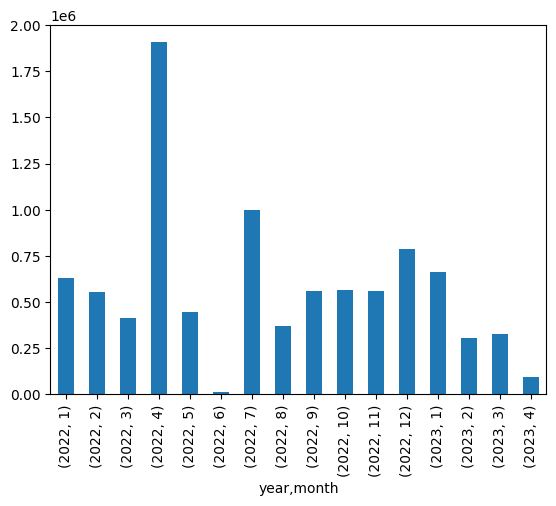

In [9]:
inventories_df.groupby(['year', 'month'])['quantity'].sum().plot(kind='bar')
plt.show()

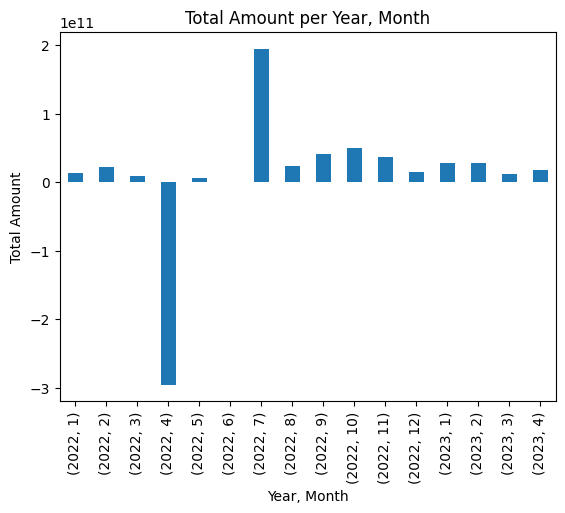

In [10]:
inventories_df.groupby(['year', 'month'])['total_amount'].sum().plot(kind='bar')
plt.xlabel('Year, Month')
plt.xticks(rotation=90)
plt.ylabel('Total Amount')
plt.title('Total Amount per Year, Month')
plt.show()

In [11]:
# %pip install xlrd openpyxl
product_master = pd.read_excel('../data/MasterData/Productmaster.xlsx')

In [12]:
product_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94867 entries, 0 to 94866
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            94867 non-null  int64  
 1   index                 94867 non-null  int64  
 2   color                 94822 non-null  object 
 3   color_group           94867 non-null  object 
 4   listing_price         94840 non-null  float64
 5   price_group           94840 non-null  object 
 6   gender                94867 non-null  object 
 7   product_group         94867 non-null  object 
 8   detail_product_group  94867 non-null  object 
 9   shoe_product          94867 non-null  object 
 10  size_group            94867 non-null  object 
 11  size                  94722 non-null  float64
 12  age_group             94867 non-null  object 
 13  activity_group        94867 non-null  object 
 14  collection            94862 non-null  object 
 15  image_copyright    

In [13]:
product_group_id = product_master[['product_group', 'product_id']]
product_group_id.shape

(94867, 2)

In [14]:
merged_df = pd.merge(inventories_df, product_group_id, on='product_id', how='inner')
merged_df

,plant,year,month,sloc,quantity,total_amount,product_id,product_group
0,1101,2022,2,3000,17,17000,1259098aaa8e447181f13903f84e5db1OOO35,PKI
1,1103,2022,2,3000,8,0,1259098aaa8e447181f13903f84e5db1OOO35,PKI
2,1104,2022,2,3000,14,0,1259098aaa8e447181f13903f84e5db1OOO35,PKI
3,1105,2022,2,3000,25,0,1259098aaa8e447181f13903f84e5db1OOO35,PKI
4,1109,2022,2,3000,15,0,1259098aaa8e447181f13903f84e5db1OOO35,PKI
...,...,...,...,...,...,...,...,...
4008616,1226,2022,12,3000,20,-36720,2c219c04139c429a90efee1f42e6ef80TRG36,PKI
4008617,1401,2022,12,3000,3,0,2c219c04139c429a90efee1f42e6ef80TRG36,PKI
4008618,1226,2022,12,3000,17,-36720,b05ff266ddd0443499442b0d75e7cef7TRG37,PKI
4008619,1401,2022,12,3000,3,0,84d42100bbee4b4e84afb23e0038a955TRG36,PKI


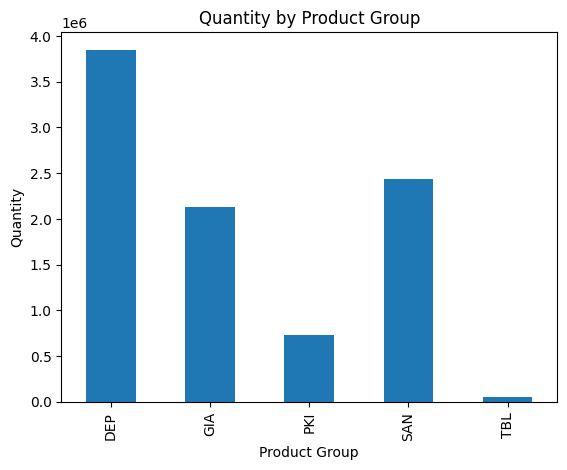

In [15]:
merged_df.groupby('product_group')['quantity'].sum().plot(kind='bar')
plt.xlabel('Product Group')
plt.ylabel('Quantity')
plt.title('Quantity by Product Group')
plt.show()

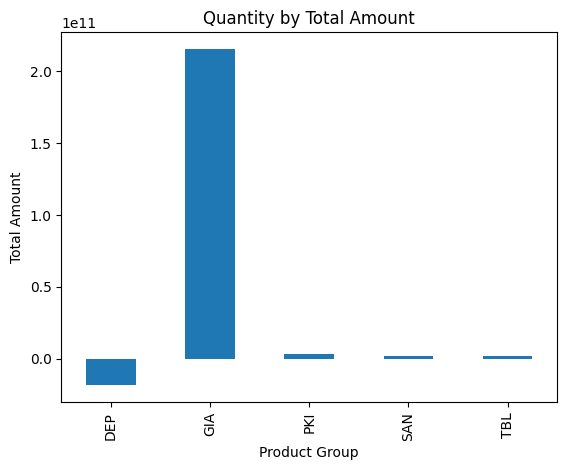

In [16]:
merged_df.groupby('product_group')['total_amount'].sum().plot(kind='bar')
plt.xlabel('Product Group')
plt.ylabel('Total Amount')
plt.title('Quantity by Total Amount')
plt.show()

In [17]:
top_product = merged_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(5)
top_product = merged_df.loc[merged_df['product_id'].isin(top_product.index)]
top_product['product_group'].unique()

array(['PKI'], dtype=object)